In [1]:
push!(LOAD_PATH, pwd())
using Util

┌ Info: Precompiling Util [top-level]
└ @ Base loading.jl:1187


In [2]:
mutable struct Node
    id
    pos
    neighs
end

Node(id, x :: Float64, y :: Float64) = Node(id, (x,y), [])

Node

In [3]:
each_neighbour(n :: Node) = n.neighs

each_neighbour (generic function with 1 method)

In [4]:
path_costs_estimate(n1 :: Node, n2 :: Node) =sqrt((n1.pos[1]-n2.pos[1])^2  + (n1.pos[2]-n2.pos[2])^2)

path_costs_estimate (generic function with 1 method)

In [5]:
function path_costs(n1 :: Node, n2 :: Node)
    if n2 in n1.neighs
        path_costs_estimate(n1, n2)
    else
        nothing
    end
end

path_costs (generic function with 1 method)

In [6]:
function link(n1, n2) 
    push!(n1.neighs, n2)
    push!(n2.neighs, n1)
end

link (generic function with 1 method)

In [7]:
a = Node("a", 0.1, 0.1)
b = Node("b", 0.7, 0.2)
c = Node("c", 0.7, 0.9)
d = Node("d", 0.1, 0.95)
link(a,b)
link(b,c)
link(c,d)
link(b,d);

In [15]:
p, c = Pathfinding.path_Astar(a, d, path_costs, path_costs_estimate, each_neighbour);
for n in p
    println(n.id)
end

c

d
b
a


┌ Warning: Deprecated syntax `implicit assignment to global variable `n``.
│ Use `global n` instead.
└ @ nothing none:0
┌ Warning: Loop variable `n` around In[15]:2 overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing In[15]:2


3

In [9]:
using GeoGraph
using Luxor

In [10]:
locs, links = create_random_geo_graph(100, 0.2)

(Tuple{Float64,Float64}[(0.317333, 0.370518), (0.0316914, 0.130325), (0.755291, 0.985936), (0.182584, 0.114129), (0.0150463, 0.373686), (0.650732, 0.573085), (0.93287, 0.170129), (0.561137, 0.29687), (0.862645, 0.188353), (0.328358, 0.620729)  …  (0.29915, 0.0176952), (0.939483, 0.233663), (0.726427, 0.983662), (0.137119, 0.863558), (0.721473, 0.70376), (0.575382, 0.373312), (0.754554, 0.633095), (0.552774, 0.821683), (0.12969, 0.777949), (0.401254, 0.12108)], Tuple{Int64,Int64}[(4, 2), (9, 7), (11, 6), (12, 10), (13, 1), (14, 6), (14, 11), (15, 10), (16, 1), (17, 6)  …  (99, 38), (99, 49), (99, 52), (99, 94), (100, 13), (100, 22), (100, 40), (100, 48), (100, 56), (100, 91)])

In [11]:
nodes = []
i = 1
for l in locs
    push!(nodes, Node(i, l[1], l[2]))
    i += 1
end

In [12]:
for (n1, n2) in links
    link(nodes[n1], nodes[n2])
end

In [18]:
sta = rand(1:100)
sto = sta
while sto == sta
    sto = rand(1:100)
end

sto, sta = 19, 49

p, n = Pathfinding.path_Astar(nodes[sto], nodes[sta], path_costs, path_costs_estimate, each_neighbour);

n

139

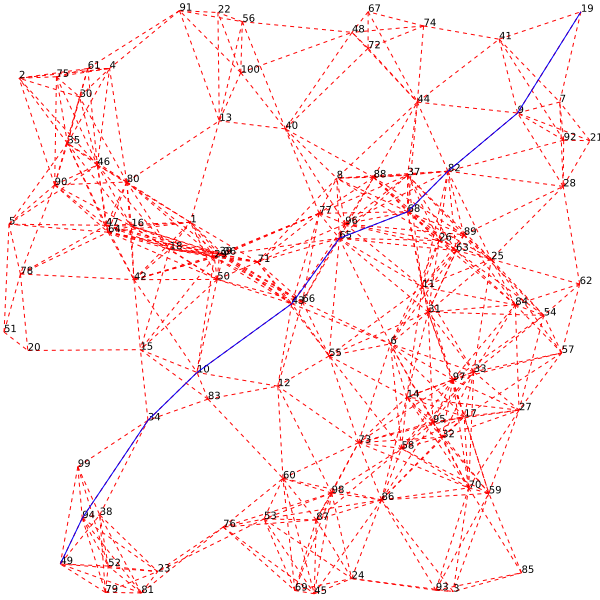

In [19]:
g2lux(node) = Point(((node.pos .- 0.5) .* 600)...)

@svg begin
    
    setdash("dashed")
    setline(1)
    setcolor("red")
    for (l1, l2) in links
        n1 = nodes[l1]
        n2 = nodes[l2]
        line(g2lux(n1), g2lux(n2), :stroke)
    end
    
    setcolor("black")
    for n in nodes
        text("$(n.id)", g2lux(n))
    end
    
    setdash("solid")
    setcolor("blue")
    for i in 1:(length(p)-1)
        line(g2lux(p[i]), g2lux(p[i+1]), :stroke)
    end
        
end